# Corpora and NLTK

Much of the information below is taken from http://www.nltk.org/book/ch02.html

In linguistics, a corpus (plural corpora) or text corpus is a large and structured set of texts (nowadays usually electronically stored and processed). They are used to do statistical analysis and hypothesis testing, checking occurrences or validating linguistic rules within a specific language territory.

Question:

 * Why do we need data in the first place?
 
Answer:

 * We use data to write our probability functions for us. 

A lot of common, freely available corpora can be easily accessed via nltk (you may need to run `nltk.download()`)

In [1]:
import nltk

### The Brown Corpus

The Brown Corpus was the first million-word electronic corpus of English, created in 1961 at Brown University. This corpus contains text from 500 sources, and the sources have been categorized by genre, such as news, editorial, and so on. 1.1 gives an example of each genre (for a complete list, see http://icame.uib.no/brown/bcm-los.html).

```
ID	File	Genre	Description
A16	ca16	news	Chicago Tribune: Society Reportage
B02	cb02	editorial	Christian Science Monitor: Editorials
C17	cc17	reviews	Time Magazine: Reviews
D12	cd12	religion	Underwood: Probing the Ethics of Realtors
E36	ce36	hobbies	Norling: Renting a Car in Europe
F25	cf25	lore	Boroff: Jewish Teenage Culture
G22	cg22	belles_lettres	Reiner: Coping with Runaway Technology
H15	ch15	government	US Office of Civil and Defence Mobilization: The Family Fallout Shelter
J17	cj19	learned	Mosteller: Probability with Statistical Applications
K04	ck04	fiction	W.E.B. Du Bois: Worlds of Color
L13	cl13	mystery	Hitchens: Footsteps in the Night
M01	cm01	science_fiction	Heinlein: Stranger in a Strange Land
N14	cn15	adventure	Field: Rattlesnake Ridge
P12	cp12	romance	Callaghan: A Passion in Rome
R06	cr06	humor	Thurber: The Future, If Any, of Comedy
```

This corpus is more *balanced* than other corpora because it reprsents a wide variety of genres. 

In [2]:
from nltk.corpus import brown
#nltk.download()
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [3]:
brown.words(categories='news')

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [4]:
len(brown.words(categories='news'))

100554

In [55]:
brown.words(fileids=['cg22']) # you can give it a single string or a list

['Does', 'our', 'society', 'have', 'a', 'runaway', ',', ...]

In [56]:
brown.sents(categories=['news', 'editorial', 'reviews'])

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

In [6]:
news_text = brown.words(categories='news')
fdist = nltk.FreqDist(w.lower() for w in news_text)
modals = ['can', 'could', 'may', 'might', 'must', 'will']
for m in modals:
    print(m + ':', fdist[m], end=' ')

can: 94 could: 87 may: 93 might: 38 must: 53 will: 389 

In [7]:
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


### Innagural Address Corpus

In [8]:
from nltk.corpus import inaugural
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

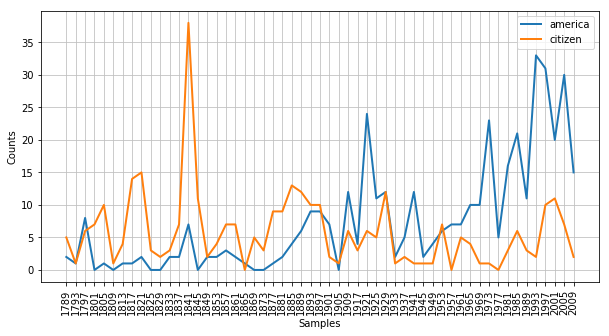

In [9]:
%matplotlib inline

from matplotlib import pyplot as plt
plt.figure(figsize=(10,5)) # make a plot a little wider than it would otherwise be

cfd = nltk.ConditionalFreqDist(
    [(target, fileid[:4]) for fileid in inaugural.fileids() for w in inaugural.words(fileid)for target in ['america', 'citizen'] if w.lower().startswith(target)])
cfd.plot()

#### For more data, see http://nltk.org/data

# NLTK and FreqDist

* a nice alternative to Counter
* more info: http://www.nltk.org/_modules/nltk/probability.html

In [10]:
fd = nltk.FreqDist(word for word in brown.words(categories='romance')[:10000])

fd.most_common(50)

[(',', 557),
 ('.', 436),
 ('the', 408),
 ('and', 304),
 ('to', 236),
 ('of', 182),
 ('a', 181),
 ('was', 136),
 ('``', 133),
 ("''", 133),
 ('her', 125),
 ('in', 121),
 ('had', 111),
 ('she', 106),
 ('that', 104),
 ('it', 85),
 ('he', 84),
 ('his', 84),
 ('with', 71),
 ('for', 66),
 ('be', 60),
 ('?', 60),
 ('!', 56),
 ('would', 50),
 ('said', 50),
 ('have', 46),
 ('on', 45),
 ('at', 44),
 ('him', 44),
 ('but', 43),
 ('you', 42),
 ('He', 41),
 (';', 40),
 ('not', 39),
 ('I', 39),
 ('could', 38),
 ('about', 37),
 ('She', 37),
 ('--', 36),
 ('The', 35),
 ('from', 33),
 ('been', 31),
 ('so', 31),
 ('as', 30),
 ('one', 30),
 ('out', 29),
 ('were', 27),
 ('up', 27),
 ('back', 26),
 ('there', 25)]

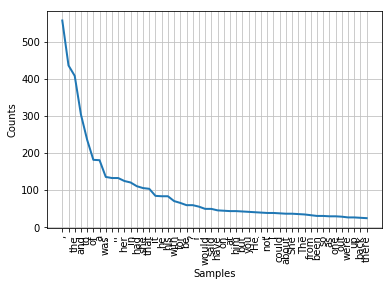

In [11]:
fd.plot(50)

#### Writing our own probability functions using FreqDist

In [12]:
fd.freq('could')

0.0038

In [13]:
def P(W=''):
    return fd.freq(W)

In [14]:
P(W='could')

0.0038

Make sure it sums to one. 

In [15]:
import numpy as np

np.sum(fd.freq(w) for w in fd.keys())

0.9999999999999669

### NLTK and ConditionalFreqDist

* Just needs a list of tuples, the rest is taken care of for you

In [16]:
genre_word = [(genre, word)
                for genre in ['news', 'romance']
                for word in brown.words(categories=genre)]

len(genre_word)

170576

In [17]:
genre_word[:10] # first 10

[('news', 'The'),
 ('news', 'Fulton'),
 ('news', 'County'),
 ('news', 'Grand'),
 ('news', 'Jury'),
 ('news', 'said'),
 ('news', 'Friday'),
 ('news', 'an'),
 ('news', 'investigation'),
 ('news', 'of')]

In [18]:
genre_word[-10:] # last 10

[('romance', 'Washington'),
 ('romance', 'episode'),
 ('romance', "''"),
 ('romance', '.'),
 ('romance', '``'),
 ('romance', "I'm"),
 ('romance', 'afraid'),
 ('romance', 'not'),
 ('romance', "''"),
 ('romance', '.')]

In [19]:
cfd = nltk.ConditionalFreqDist(genre_word)

In [20]:
float(len(cfd['romance']))

8452.0

#### The number above is the length of words of a particular genre (i.e., the length of the vocabulary). What is the actual number of words in the genre?

In [21]:
cfd['romance'].N() 

70022

In [22]:
cfd['romance']['could']

193

#### Can we write our probability functions with ConditionalFreqDist?

In [23]:
cfd['romance']['could'] / cfd['romance'].N()

0.0027562765987832393

In [24]:
def Pwg(W='',G=''):  # probability of a word given a genre
    return cfd[G][W] / cfd[G].N() # why can't we just use len?

In [25]:
Pwg(W='could', G='romance')

0.0027562765987832393

Is it really a prob function? Let's see if it sums to one. 

In [26]:
vocab = cfd['news'].keys() # the set of words in the FreqDist

In [27]:
import numpy as np

round(np.sum(Pwg(W=w, G='news') for w in vocab),4)

1.0

It looks like FreqDist and ConditionalFreqDist are really useful!

* Why isn't there a JointFreqDist?

# WordNet

* NLTK provies an interface to the WordNet project: https://wordnet.princeton.edu/
* WordNet is a semantically-oriented dictionary of English, similar to a traditional thesaurus but with a richer structure. NLTK includes the English WordNet, with 155,287 words and 117,659 synonym sets. We'll begin by looking at synonyms and how they are accessed in WordNet.

### Senses and Synonyms

Consider the sentence in (1a). If we replace the word motorcar in (1a) by automobile, to get (1b), the meaning of the sentence stays pretty much the same:
		
 * Benz is credited with the invention of the motorcar.
 * Benz is credited with the invention of the automobile.



In [28]:
from nltk.corpus import wordnet as wn
wn.synsets('motorcar')

[Synset('car.n.01')]

In [29]:
wn.synset('car.n.01').lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [30]:
wn.synset('car.n.01').definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [31]:
wn.synset('car.n.01').examples()

['he needs a car to get to work']

In [32]:
for synset in wn.synsets('car'):
    print(synset, synset.lemma_names())

Synset('car.n.01') ['car', 'auto', 'automobile', 'machine', 'motorcar']
Synset('car.n.02') ['car', 'railcar', 'railway_car', 'railroad_car']
Synset('car.n.03') ['car', 'gondola']
Synset('car.n.04') ['car', 'elevator_car']
Synset('cable_car.n.01') ['cable_car', 'car']


### The WordNet Concept Hierarchy

* WordNet synsets correspond to abstract concepts, and they don't always have corresponding words in English. These concepts are linked together in a hierarchy. 

In [33]:
sorted(lemma.name() for synset in wn.synset('car.n.01').hyponyms() for lemma in synset.lemmas())

['Model_T',
 'S.U.V.',
 'SUV',
 'Stanley_Steamer',
 'ambulance',
 'beach_waggon',
 'beach_wagon',
 'bus',
 'cab',
 'compact',
 'compact_car',
 'convertible',
 'coupe',
 'cruiser',
 'electric',
 'electric_automobile',
 'electric_car',
 'estate_car',
 'gas_guzzler',
 'hack',
 'hardtop',
 'hatchback',
 'heap',
 'horseless_carriage',
 'hot-rod',
 'hot_rod',
 'jalopy',
 'jeep',
 'landrover',
 'limo',
 'limousine',
 'loaner',
 'minicar',
 'minivan',
 'pace_car',
 'patrol_car',
 'phaeton',
 'police_car',
 'police_cruiser',
 'prowl_car',
 'race_car',
 'racer',
 'racing_car',
 'roadster',
 'runabout',
 'saloon',
 'secondhand_car',
 'sedan',
 'sport_car',
 'sport_utility',
 'sport_utility_vehicle',
 'sports_car',
 'squad_car',
 'station_waggon',
 'station_wagon',
 'stock_car',
 'subcompact',
 'subcompact_car',
 'taxi',
 'taxicab',
 'tourer',
 'touring_car',
 'two-seater',
 'used-car',
 'waggon',
 'wagon']

### More Lexical Relations

* Hypernyms and hyponyms are called lexical relations because they relate one synset to another. These two relations navigate up and down the "is-a" hierarchy. Another important way to navigate the WordNet network is from items to their components (meronyms) or to the things they are contained in (holonyms). For example, the parts of a tree are its trunk, crown, and so on; the part_meronyms(). The substance a tree is made of includes heartwood and sapwood; the substance_meronyms(). A collection of trees forms a forest; the member_holonyms():

In [34]:
wn.synset('tree.n.01').part_meronyms()

[Synset('burl.n.02'),
 Synset('crown.n.07'),
 Synset('limb.n.02'),
 Synset('stump.n.01'),
 Synset('trunk.n.01')]

In [35]:
wn.synset('tree.n.01').substance_meronyms()

[Synset('heartwood.n.01'), Synset('sapwood.n.01')]

In [36]:
wn.synset('tree.n.01').member_holonyms()

[Synset('forest.n.01')]

In [37]:
for synset in wn.synsets('mint', wn.NOUN):
    print(synset.name() + ':', synset.definition())

batch.n.02: (often followed by `of') a large number or amount or extent
mint.n.02: any north temperate plant of the genus Mentha with aromatic leaves and small mauve flowers
mint.n.03: any member of the mint family of plants
mint.n.04: the leaves of a mint plant used fresh or candied
mint.n.05: a candy that is flavored with a mint oil
mint.n.06: a plant where money is coined by authority of the government


In [38]:
wn.synset('mint.n.04').part_holonyms()

[Synset('mint.n.02')]

In [39]:
wn.synset('mint.n.04').substance_holonyms()

[Synset('mint.n.05')]

**entailment**

In [40]:
wn.synset('walk.v.01').entailments()

[Synset('step.v.01')]

In [41]:
wn.synset('eat.v.01').entailments()

[Synset('chew.v.01'), Synset('swallow.v.01')]

In [42]:
wn.synset('tease.v.03').entailments()

[Synset('arouse.v.07'), Synset('disappoint.v.01')]

**antonymy**

In [43]:
wn.lemma('supply.n.02.supply').antonyms()

[Lemma('demand.n.02.demand')]

In [44]:
wn.lemma('rush.v.01.rush').antonyms()

[Lemma('linger.v.04.linger')]

In [45]:
wn.lemma('horizontal.a.01.horizontal').antonyms()

[Lemma('vertical.a.01.vertical'), Lemma('inclined.a.02.inclined')]

In [46]:
wn.lemma('staccato.r.01.staccato').antonyms()

[Lemma('legato.r.01.legato')]

### Semantic Similarity

In [47]:
wn.synset('cat.n.01').lowest_common_hypernyms(wn.synset('bug.n.01'))

[Synset('animal.n.01')]

In [57]:
wn.synset('kitten.n.01').path_similarity(wn.synset('cat.n.01'))

0.09090909090909091

In [62]:
wn.synset('talk.v.01').lowest_common_hypernyms(wn.synset('speak.v.01'))

[Synset('communicate.v.02')]